In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
# Reading Dataset

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
df.shape

(20640, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

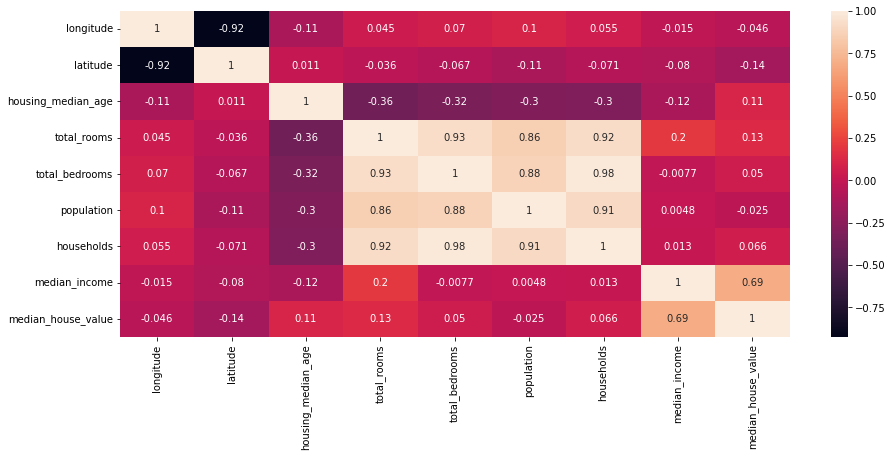

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [11]:
df.drop(['total_bedrooms','households','population'],axis=1,inplace=True)

<AxesSubplot:>

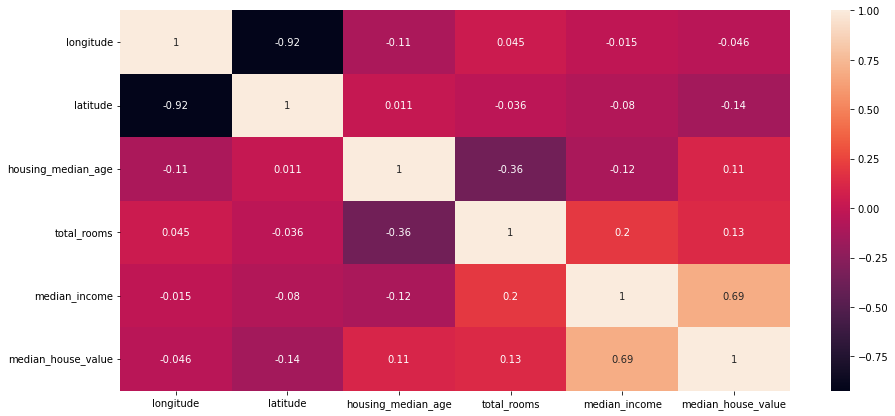

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [13]:
df['ocean_proximity'].value_counts(normalize=True)*100

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64

In [14]:
df['ocean_proximity'].replace(to_replace = {'ISLAND':'NEAR OCEAN'}, inplace= True)

In [15]:
df['ocean_proximity'].value_counts(normalize=True)*100

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.902132
NEAR BAY      11.094961
Name: ocean_proximity, dtype: float64

In [16]:
df.isnull().sum()/len(df)*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
df = pd.get_dummies(df, drop_first = True)

In [20]:
x = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [21]:
# Model Building

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.2, random_state=100)

In [23]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
print(x_train.shape)

(16512, 8)


In [25]:
print(y_train.shape)

(16512,)


In [26]:
# Creating Artificial Neural Network

In [27]:
# importing libraries

In [28]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [29]:
# Initializing the ANN

In [30]:
ann_re = Sequential()

In [31]:
# Adding the input layer and first hidden layer

In [32]:
ann_re.add(Dense(activation = 'relu', input_dim = 8, units = 512, kernel_initializer = 'uniform'))

In [33]:
# 2nd hidden layer

In [34]:
ann_re.add(Dense(activation = 'relu', units =  512,kernel_initializer = 'uniform'))

In [35]:
# 3rd hidden layer

In [36]:
ann_re.add(Dense(activation = 'relu', units = 256, kernel_initializer = 'uniform'))

In [37]:
# 4th hidden layer

In [38]:
ann_re.add(Dense(activation = 'relu', units = 128, kernel_initializer = 'uniform'))

In [39]:
# 5th hidden layer

In [40]:
ann_re.add(Dense(activation = 'relu', units = 64, kernel_initializer = 'uniform'))

In [41]:
# 6th hidden layer

In [42]:
ann_re.add(Dense(activation = 'relu', units = 32, kernel_initializer = 'uniform'))

In [43]:
# Output layer

In [44]:
ann_re.add(Dense(activation = 'relu', units = 1, kernel_initializer = 'uniform'))

In [45]:
# Compliling the ANN

In [46]:
ann_re.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [47]:
# Model Summary

In [48]:
ann_re.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 3

In [49]:
# Model Traning

In [50]:
ann_re.fit(x_train,y_train,validation_split=0.33, batch_size = 32, epochs = 100)

Epoch 1/100
346/346 [==============================] - 4s 8ms/step - loss: 15252749312.0000 - mae: 83863.6875 - val_loss: 5420963328.0000 - val_mae: 52140.6328
Epoch 2/100
346/346 [==============================] - 3s 7ms/step - loss: 5305491968.0000 - mae: 52346.1406 - val_loss: 5198426112.0000 - val_mae: 50767.6406
Epoch 3/100
346/346 [==============================] - 3s 7ms/step - loss: 5111500288.0000 - mae: 51389.6758 - val_loss: 5305240064.0000 - val_mae: 54689.9961
Epoch 4/100
346/346 [==============================] - 3s 7ms/step - loss: 5095149568.0000 - mae: 51205.9336 - val_loss: 5038242304.0000 - val_mae: 52585.3438
Epoch 5/100
346/346 [==============================] - 3s 7ms/step - loss: 5051445248.0000 - mae: 50829.2148 - val_loss: 5036487680.0000 - val_mae: 51814.6406
Epoch 6/100
346/346 [==============================] - 3s 8ms/step - loss: 5086613504.0000 - mae: 50931.7539 - val_loss: 5061779456.0000 - val_mae: 48899.6484
Epoch 7/100
346/346 [========================

In [51]:
y_pred = ann_re.predict(x_test)

129/129 [==============================] - 0s 2ms/step


In [52]:
from sklearn import metrics 
y_pred = ann_re.predict(x_test)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R_squared_value = metrics.r2_score(y_test,y_pred)

129/129 [==============================] - 0s 2ms/step


In [53]:
P = int(len(df.columns)-1)
N = int(len(df))
Adj_R_squared_Value =1 - ((1-R_squared_value)*(N - 1)/(N-P-1))

In [54]:
MAE

42140.83852747244

In [55]:
MSE

3371598368.9652348

In [56]:
RMSE

58065.466233943516

In [57]:
R_squared_value

0.7497695387511782

In [58]:
Adj_R_squared_Value

0.7496725078903382